In [159]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [160]:

df=pd.read_csv('phone_data.csv')

In [161]:
x=df.drop(columns=['Processor'],axis=1)
y=df['Processor']


In [162]:
for col in df.columns:
    le= LabelEncoder()
    df[col]=le.fit_transform(df[col])
df.head()

Brand  Model  Release_Year  Screen_Size (inches)  Processor  RAM (GB)  \
0      3    120            12                     7          2         8   
1      0    116            10                    20          3         3   
2      4    286            13                    20          3         0   
3      5    267             5                    23          1        11   
4      3    324            12                    20          3        10   

   Storage (GB)  Rear_Camera (MP)  Front_Camera (MP)  Battery (mAh)  \
0           218                58                  5             92   
1            33                91                 11            122   
2           245                25                  0             76   
3           194                59                  0            324   
4           221                 8                 33            352   

   Operating_System  Price (USD)  Weight (g)  Dimensions (mm)  SIM_Card_Type  \
0                 0          102          10               26              2   
1                 1          377         361              315              1   
2                 1          348         295              150              2   
3                 1          136         337              177              2   
4                 1           64         281               43              1   

   Connectivity  Color  Water_Resistance  Rating  
0             3      0                 1       7  
1             3      4                 1      19  
2             2      2                 1      19  
3             1      3                 0      18  
4             1      2                 1       1

In [163]:

scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [164]:
scaled_data=scaler.transform(df)

In [165]:
pca=PCA(n_components=5)

In [166]:
pca.fit(scaled_data)
#variance calculate 

PCA(n_components=5)

In [167]:
x_pca = pca.transform(scaled_data)


In [168]:
scaled_data.shape

(400, 19)

In [169]:
x_pca.shape

(400, 5)

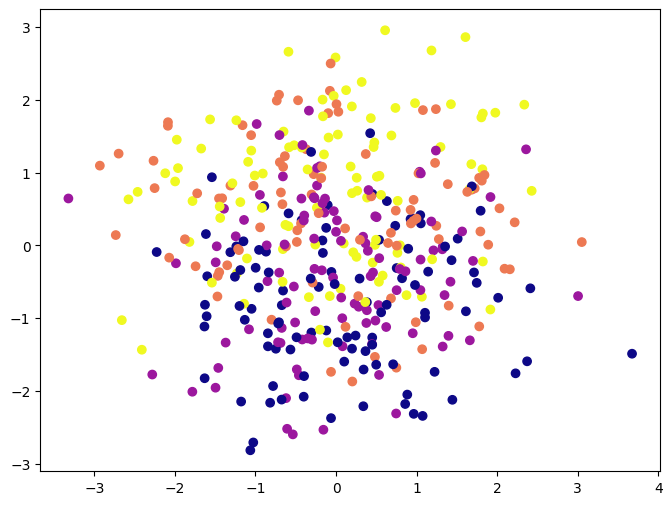

In [170]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Processor'],cmap='plasma')

In [171]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
ft=clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.325


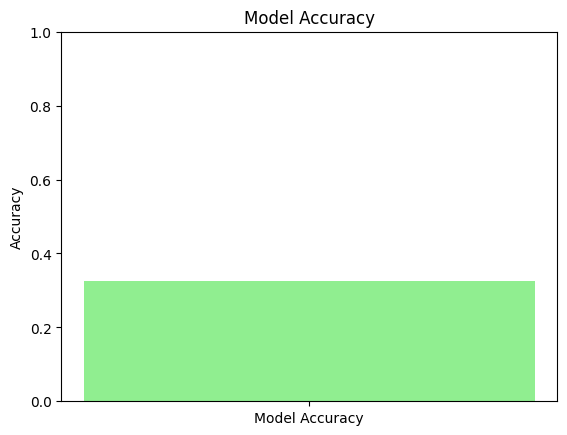

In [172]:
#Bar graph to visualize the accuracy
plt.bar(["Model Accuracy"], [accuracy], color=['lightgreen'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [173]:
# Perform cross-validation
cv_scores = cross_val_score(clf, x_pca, y, cv=5) 

# Calculate the mean accuracy of the cross-validation
mean_accuracy = cv_scores.mean()

print("Cross-Validation Mean Accuracy:", mean_accuracy)

Cross-Validation Mean Accuracy: 0.3875


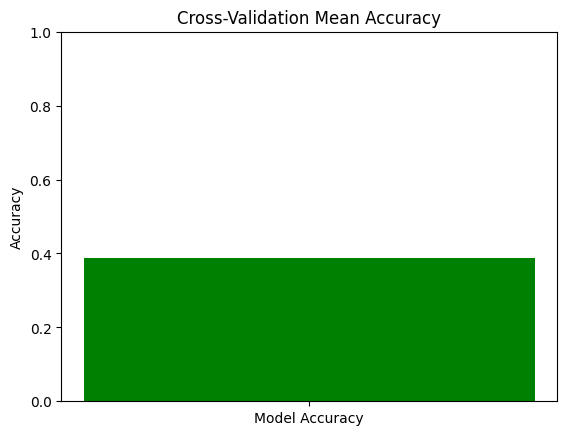

In [174]:
#Bar graph to visualize the accuracy
plt.bar(["Model Accuracy"], [mean_accuracy], color=['green'])
plt.title("Cross-Validation Mean Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

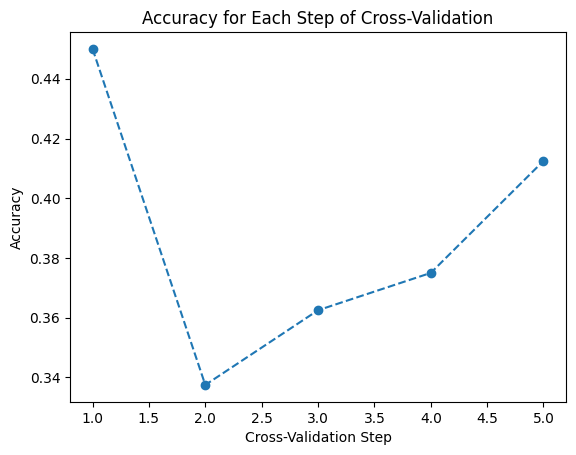

In [175]:

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Step of Cross-Validation')
plt.show()